<a href="https://colab.research.google.com/github/Med-Rokaimi/mytest/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("sample_data/housepricedata.csv")

In [7]:
dataset=df.values

In [5]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [8]:
dataset = df.values

In [9]:
X= dataset[:,0:10]

In [11]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [25]:
Y=dataset[:,10]

In [26]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [12]:
from sklearn import preprocessing

In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [27]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [41]:
X_train, X_test, Y_train , Y_test = train_test_split(X_scale, Y, test_size=0.3)
X_train

array([[0.04531071, 0.77777778, 0.5       , ..., 0.41666667, 0.33333333,
        0.43723554],
       [0.02708173, 0.44444444, 0.5       , ..., 0.25      , 0.        ,
        0.27080395],
       [0.06754072, 0.44444444, 0.5       , ..., 0.25      , 0.66666667,
        0.26445698],
       ...,
       [0.04650728, 0.55555556, 0.625     , ..., 0.33333333, 0.33333333,
        0.38504937],
       [0.03714973, 0.55555556, 0.625     , ..., 0.33333333, 0.        ,
        0.28208745],
       [0.02897941, 0.66666667, 0.5       , ..., 0.33333333, 0.        ,
        0.        ]])

In [30]:
from keras import Sequential
from keras.layers import Dense

In [42]:
model=Sequential([
                  Dense(32,activation='relu', input_shape=(10,)),
                  Dense(32, activation='relu'),
                  Dense(1, activation='sigmoid'),
])

In [45]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
hist=model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2756 - accuracy: 0.8875 - val_loss: 0.3108 - val_accuracy: 0.8790
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2742 - accuracy: 0.8865 - val_loss: 0.3086 - val_accuracy: 0.8836
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.2739 - accuracy: 0.8845 - val_loss: 0.3056 - val_accuracy: 0.8836
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2730 - accuracy: 0.8845 - val_loss: 0.3086 - val_accuracy: 0.8836
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2719 - accuracy: 0.8836 - val_loss: 0.3044 - val_accuracy: 0.8836
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2720 - accuracy: 0.8865 - val_loss: 0.3055 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2704 - accuracy: 0.8836 - val_loss: 0.3079 - val_accuracy: 0.8836
Epoch 8/10

In [55]:
model.evaluate(X_test, Y_test)[1]

14/14 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8881


0.888127863407135

In [48]:
import matplotlib.pyplot as plt

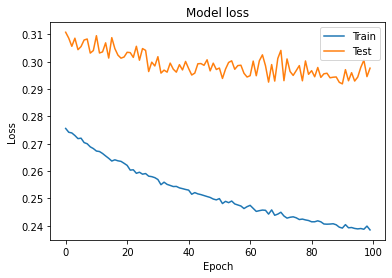

In [56]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

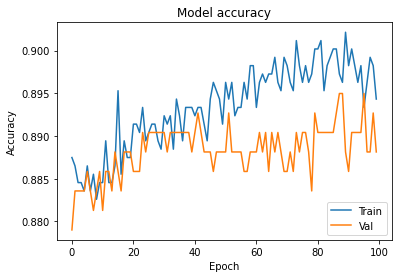

In [57]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [58]:
model_2 = Sequential([
Dense(1000, activation='relu', input_shape=(10,)),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 0.4919 - accuracy: 0.7632 - val_loss: 0.3844 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3341 - accuracy: 0.8562 - val_loss: 0.3400 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2952 - accuracy: 0.8796 - val_loss: 0.3068 - val_accuracy: 0.8744
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2741 - accuracy: 0.8836 - val_loss: 0.3332 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2607 - accuracy: 0.8865 - val_loss: 0.3081 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2475 - accuracy: 0.8992 - val_loss: 0.3059 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2510 - accuracy: 0.8924 - val_loss: 0.3604 - val_accuracy: 0.8584
Epoch 

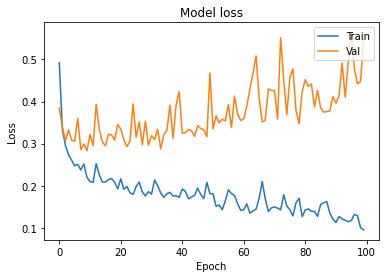

In [59]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()